<h1><center><u>Image Classification using CIFAR-10</u></center></h1>

<font size='3.5'>The objective of this project is to classify images from CIFAR-10 dataset</font>

<font size='3.5'>  </font>

In [1]:
#Importimg required dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) =cifar10.load_data()

170498071/170498071 [==============================] - 49s 0us/step


#### Scaling dataset

In [3]:
X_train[0].max()

255

In [4]:
X_test[0].max()

255

In [5]:
# We can scale the data to the range between 0 and 1 by dividing it by 255.

X_test = X_test/255
X_train = X_train/255

In [6]:
# TO find the number of unique elements in the output labels

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:

from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

#### Building model

In [8]:
#Importing required packages for building the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [9]:
model = Sequential()

# First Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1),
                 padding='valid', input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd covolutional layer due to too much information in color image
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1),
                 padding='valid', input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) # Flatten 32*32*3 to 3072

model.add(Dense(units=256, activation='relu')) # More neurons since its color image

model.add(Dense(units=10, activation='softmax')) # Output layer and Multi Class classifaction

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [11]:
# Compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#Defining Early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [13]:
# Executing the model

model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
          callbacks=[early_stop], epochs=15)

Epoch 1/15
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5201 - accuracy: 0.4494 - val_loss: 1.2810 - val_accuracy: 0.5353
Epoch 2/15
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1846 - accuracy: 0.5780 - val_loss: 1.2081 - val_accuracy: 0.5686
Epoch 3/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0375 - accuracy: 0.6347 - val_loss: 1.0561 - val_accuracy: 0.6261
Epoch 4/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9337 - accuracy: 0.6721 - val_loss: 1.0471 - val_accuracy: 0.6369
Epoch 5/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8457 - accuracy: 0.7038 - val_loss: 0.9689 - val_accuracy: 0.6598
Epoch 6/15
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7741 - accuracy: 0.7282 - val_loss: 1.0192 - val_accuracy: 0.6540
Epoch 7/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7021 - accuracy: 0.7509 - val_loss: 1.0061 -

#### Evaluation of model

In [14]:
# Printing the loss, accuracy, value loss and value accuracy of the model
model_hist = pd.DataFrame(model.history.history)
model_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,1.520083,0.44940,1.280964,0.5353
1,1.184628,0.57804,1.208059,0.5686
2,1.037494,0.63474,1.056149,0.6261
3,0.933667,0.67214,1.047052,0.6369
4,0.845693,0.70380,0.968936,0.6598


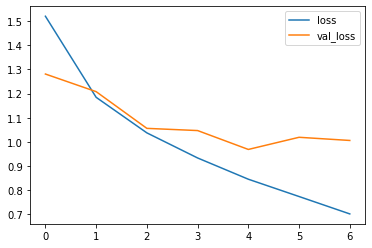

In [15]:
# potting loss vs val_loss
model_hist[['loss', 'val_loss']].plot()

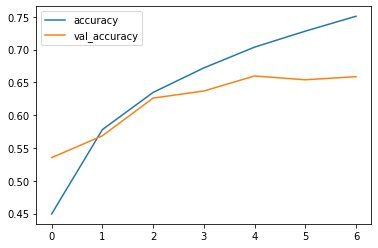

In [16]:
#plotting accuracy vs val_accuracy
model_hist[['accuracy','val_accuracy']].plot()

In [17]:
# model.predict_classes() is deprecated and will be removed after 2021-01-01. Please use instead:* np.argmax(model.predict(x), axis=-1), 
# if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
# (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

y_pred = model.predict(X_test)
classes_x=np.argmax(y_pred,axis=1)
classes_x

313/313 [==============================] - 2s 5ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [18]:
#Printing the classifiication report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.74      0.65      0.70      1000
           1       0.84      0.75      0.79      1000
           2       0.56      0.53      0.54      1000
           3       0.54      0.38      0.45      1000
           4       0.49      0.77      0.60      1000
           5       0.56      0.59      0.58      1000
           6       0.77      0.70      0.73      1000
           7       0.83      0.62      0.71      1000
           8       0.69      0.83      0.75      1000
           9       0.71      0.77      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



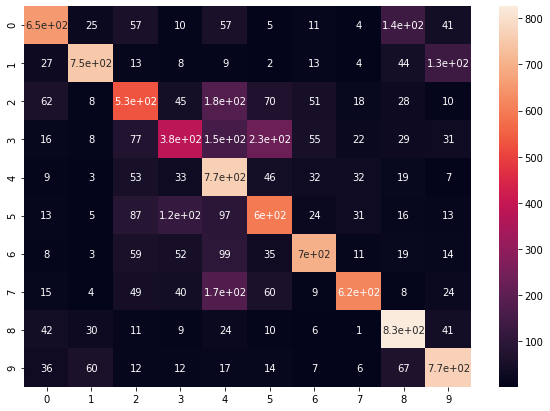

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, classes_x), annot=True)